In [1]:
import cellxgene_census
# Initialize the census
census = cellxgene_census.open_soma()

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


In [2]:
import cellxgene_census

# Open the census
with cellxgene_census.open_soma() as census:
    # Access the 'obs' table
    obs = census["census_data"]["mus_musculus"].obs

    # Load the table into a pandas DataFrame for easier manipulation
    obs_df = obs.read().concat().to_pandas()


    # Filter cells based on conditions, e.g., cells from a specific tissue
    condition = (obs_df['suspension_type'] == "cell") & (obs_df['is_primary_data'] == True)
    filtered_cells = obs_df[condition]

    # Get the number of cells
    num_cells = len(filtered_cells)
    print(f"Number of cells under the specified conditions: {num_cells}")
    # Count the number of cells per assay
    cells_per_assay = filtered_cells.groupby("assay").size()

    # Display the results
    print("Number of cells per assay:")
    print(cells_per_assay)

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


Number of cells under the specified conditions: 3572293
Number of cells per assay:
assay
10x 3' transcription profiling          0
10x 3' v1                           21456
10x 3' v2                         2312667
10x 3' v3                          768248
10x 5' v1                          136376
DroNc-seq                               0
Drop-seq                           147681
Smart-seq                            1679
Smart-seq v4                        73362
Smart-seq2                         110824
sci-RNA-seq                             0
dtype: int64


/tmp/ipykernel_2877372/1073912041.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cells_per_assay = filtered_cells.groupby("assay").size()


In [3]:
obs_df

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,tissue,tissue_ontology_term_id,tissue_type,tissue_general,tissue_general_ontology_term_id,raw_sum,nnz,raw_mean_nnz,raw_variance_nnz,n_measured_vars
0,0,a810e511-c18b-4b2a-8fdf-98a6a0d433a7,10x 3' v2,EFO:0009899,fibroblast of connective tissue of prostate,CL:1000299,2 month-old stage,MmusDv:0000062,normal,PATO:0000461,...,prostate gland,UBERON:0002367,tissue,prostate gland,UBERON:0002367,2019.0,1018,1.983301,12.698836,17113
1,1,a810e511-c18b-4b2a-8fdf-98a6a0d433a7,10x 3' v2,EFO:0009899,fibroblast of connective tissue of prostate,CL:1000299,2 month-old stage,MmusDv:0000062,normal,PATO:0000461,...,prostate gland,UBERON:0002367,tissue,prostate gland,UBERON:0002367,2789.0,1123,2.483526,32.763320,17113
2,2,a810e511-c18b-4b2a-8fdf-98a6a0d433a7,10x 3' v2,EFO:0009899,fibroblast of connective tissue of prostate,CL:1000299,2 month-old stage,MmusDv:0000062,normal,PATO:0000461,...,prostate gland,UBERON:0002367,tissue,prostate gland,UBERON:0002367,1996.0,966,2.066253,61.015295,17113
3,3,a810e511-c18b-4b2a-8fdf-98a6a0d433a7,10x 3' v2,EFO:0009899,fibroblast of connective tissue of prostate,CL:1000299,2 month-old stage,MmusDv:0000062,normal,PATO:0000461,...,prostate gland,UBERON:0002367,tissue,prostate gland,UBERON:0002367,2238.0,981,2.281346,18.481988,17113
4,4,a810e511-c18b-4b2a-8fdf-98a6a0d433a7,10x 3' v2,EFO:0009899,fibroblast of connective tissue of prostate,CL:1000299,2 month-old stage,MmusDv:0000062,normal,PATO:0000461,...,prostate gland,UBERON:0002367,tissue,prostate gland,UBERON:0002367,2561.0,1194,2.144891,67.072870,17113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41233625,41233625,dcfd4feb-18a3-4b30-81d7-1b0c544a8ab3,sci-RNA-seq,EFO:0010550,myoblast,CL:0000056,Theiler stage 26,MmusDv:0000035,normal,PATO:0000461,...,embryo,UBERON:0000922,tissue,embryo,UBERON:0000922,683.0,555,1.230631,1.322165,44259
41233626,41233626,dcfd4feb-18a3-4b30-81d7-1b0c544a8ab3,sci-RNA-seq,EFO:0010550,neuron,CL:0000540,Theiler stage 26,MmusDv:0000035,normal,PATO:0000461,...,embryo,UBERON:0000922,tissue,embryo,UBERON:0000922,1133.0,715,1.584615,4.570911,44259
41233627,41233627,dcfd4feb-18a3-4b30-81d7-1b0c544a8ab3,sci-RNA-seq,EFO:0010550,osteoblast,CL:0000062,Theiler stage 26,MmusDv:0000035,normal,PATO:0000461,...,embryo,UBERON:0000922,tissue,embryo,UBERON:0000922,2990.0,1731,1.727325,6.576473,44259
41233628,41233628,dcfd4feb-18a3-4b30-81d7-1b0c544a8ab3,sci-RNA-seq,EFO:0010550,hepatocyte,CL:0000182,Theiler stage 26,MmusDv:0000035,normal,PATO:0000461,...,embryo,UBERON:0000922,tissue,embryo,UBERON:0000922,6247.0,2639,2.367185,15.518271,44259


In [4]:
# quindi decido di tenere tutti i topi che sono normali + malati + 10x 3' v2 

In [5]:
import cellxgene_census
import json

# Open the census
with cellxgene_census.open_soma() as census:
    # Access the 'obs' table for Mus musculus
    obs = census["census_data"]["mus_musculus"].obs

    # Load the table into a pandas DataFrame
    obs_df = obs.read().concat().to_pandas()

    # Filter for primary cells and specific suspension type
    condition = (obs_df['suspension_type'] == "cell") & (obs_df['is_primary_data'] == True)
    filtered_cells = obs_df[condition]

    # Identify the most common assay
    most_common_assay = filtered_cells["assay"].value_counts().idxmax()
    most_common_assay_count = filtered_cells["assay"].value_counts().max()

    # Filter cells with the most common assay
    assay_cells = filtered_cells[filtered_cells["assay"] == most_common_assay]

    # Count healthy and ill cells
    normal_cells_count = assay_cells[assay_cells["disease"] == "normal"].shape[0]
    ill_cells_count = assay_cells[assay_cells["disease"] != "normal"].shape[0]

    # Output results
    print(f"Most common assay: {most_common_assay} ({most_common_assay_count} cells)")
    print(f"Number of healthy cells: {normal_cells_count}")
    print(f"Number of ill cells: {ill_cells_count}")

    # Store results
    results = {
        "most_common_assay": most_common_assay,
        "total_cells_most_common_assay": most_common_assay_count,
        "healthy_cells": normal_cells_count,
        "ill_cells": ill_cells_count,
    }


The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


Most common assay: 10x 3' v2 (2312667 cells)
Number of healthy cells: 2198430
Number of ill cells: 114237


In [6]:
assay_cells

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,tissue,tissue_ontology_term_id,tissue_type,tissue_general,tissue_general_ontology_term_id,raw_sum,nnz,raw_mean_nnz,raw_variance_nnz,n_measured_vars
273188,273188,5695d556-974e-4d92-9e99-5f61b8695313,10x 3' v2,EFO:0009899,primordial germ cell,CL:0000670,Theiler stage 17,MmusDv:0000024,normal,PATO:0000461,...,gonad primordium,UBERON:0005564,tissue,reproductive system,UBERON:0000990,49012.0,5859,8.365250,832.812285,17957
273189,273189,5695d556-974e-4d92-9e99-5f61b8695313,10x 3' v2,EFO:0009899,primordial germ cell,CL:0000670,Theiler stage 17,MmusDv:0000024,normal,PATO:0000461,...,gonad primordium,UBERON:0005564,tissue,reproductive system,UBERON:0000990,24170.0,4110,5.880779,378.633142,17957
273190,273190,5695d556-974e-4d92-9e99-5f61b8695313,10x 3' v2,EFO:0009899,primordial germ cell,CL:0000670,Theiler stage 17,MmusDv:0000024,normal,PATO:0000461,...,gonad primordium,UBERON:0005564,tissue,reproductive system,UBERON:0000990,25634.0,4304,5.955855,433.874416,17957
273191,273191,5695d556-974e-4d92-9e99-5f61b8695313,10x 3' v2,EFO:0009899,primordial germ cell,CL:0000670,Theiler stage 17,MmusDv:0000024,normal,PATO:0000461,...,gonad primordium,UBERON:0005564,tissue,reproductive system,UBERON:0000990,53577.0,5716,9.373163,1194.281197,17957
273192,273192,5695d556-974e-4d92-9e99-5f61b8695313,10x 3' v2,EFO:0009899,primordial germ cell,CL:0000670,Theiler stage 17,MmusDv:0000024,normal,PATO:0000461,...,gonad primordium,UBERON:0005564,tissue,reproductive system,UBERON:0000990,50741.0,5529,9.177247,978.341950,17957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243604,11243604,d7291f04-fbbb-4d65-990a-f01fa44e915b,10x 3' v2,EFO:0009899,sst chodl GABAergic cortical interneuron,CL:4023121,8 weeks,MmusDv:0000052,normal,PATO:0000461,...,primary motor cortex,UBERON:0001384,tissue,brain,UBERON:0000955,14129.0,4737,2.982689,40.448180,28102
11243605,11243605,d7291f04-fbbb-4d65-990a-f01fa44e915b,10x 3' v2,EFO:0009899,sst chodl GABAergic cortical interneuron,CL:4023121,8 weeks,MmusDv:0000052,normal,PATO:0000461,...,primary motor cortex,UBERON:0001384,tissue,brain,UBERON:0000955,17296.0,5250,3.294476,78.175412,28102
11243606,11243606,d7291f04-fbbb-4d65-990a-f01fa44e915b,10x 3' v2,EFO:0009899,L2/3-6 intratelencephalic projecting glutamate...,CL:4023040,8 weeks,MmusDv:0000052,normal,PATO:0000461,...,primary motor cortex,UBERON:0001384,tissue,brain,UBERON:0000955,6630.0,3316,1.999397,8.890497,28102
11243607,11243607,d7291f04-fbbb-4d65-990a-f01fa44e915b,10x 3' v2,EFO:0009899,sst GABAergic cortical interneuron,CL:4023017,7 weeks,MmusDv:0000051,normal,PATO:0000461,...,medial orbital frontal cortex,UBERON:0022352,tissue,brain,UBERON:0000955,8906.0,3798,2.344918,28.916028,28102


In [7]:
# voglio sapere anche quante sono le cellule embrionali 
embrional_cell = assay_cells[assay_cells["tissue"] == "embryo"]
embrional_cell_count = embrional_cell.shape[0]
embrional_cell_count

0

In [ ]:
assay_cells['donor_id'].unique() 

['170830_AGPM', '170828_AGPM', '170823_AGPM', '170814_AGPM', '170724_T', ..., '525798', '365616', '529272', '385670', '529270']
Length: 223
Categories (1195, object): ['041218 M3', '060218 F1', '060218 M2', '061217 F3', ..., 'pooled_rgc_T5', 'pooled_rgc_T7_MPTK_1', 'pooled_rgc_T8_MPTK_2', 'pooled_rgc_T9_MPTK_3']

In [9]:
# Step 1: Remove rows with missing 'donor_id' and datasets with no cells
# Filter the data to only include rows with non-null 'donor_id'
filtered_assay_cells = assay_cells.dropna(subset=["donor_id"])

# Step 2: Group by 'dataset_id' and collect the unique donor_ids
dataset_to_donor_map = (
    filtered_assay_cells.groupby("dataset_id")["donor_id"]
    .apply(lambda x: list(x.unique()))  # Get unique donor_ids per dataset
    .to_dict()  # Convert to a dictionary
)

# Step 3: Remove datasets with zero donor cells (if any)
# Filter out dataset_ids with empty lists
dataset_to_donor_map = {k: v for k, v in dataset_to_donor_map.items() if v}

# Print the resulting dictionary
print(dataset_to_donor_map)

{'047d57f2-4d14-45de-aa98-336c6f583750': ['pooled'], '12967895-3d58-4e93-be2c-4e1bcf4388d5': ['GSM4643732', 'GSM4643733', 'GSM4643734', 'GSM4643736', 'GSM4643737', 'GSM4643738'], '23f77ae6-10af-4307-b136-76b26654ae7d': ['pooled_10x_Retina0313v2', 'pooled_10x_retina0315CD73NDRv2', 'pooled_10x_retina0315CD73Nv2', 'pooled_MouseACS2', 'pooled_MouseACS4', 'pooled_MouseACS5', 'pooled_RGC_3_AC', 'pooled_RGC_live_AC', 'pooled_MouseACS3', 'pooled_MouseACS7', 'pooled_MouseACS1', 'pooled_MouseACS10', 'pooled_MouseACS6', 'pooled_MouseACS8', 'pooled_MouseACS9', 'pooled_Pten_sub_CtCre1', 'pooled_Pten_sub_CtCre2', 'pooled_Pten_sub_CtNoCreP1', 'pooled_Pten_sub_CtNoCrePSC1', 'pooled_aRGC1', 'pooled_aRGC10', 'pooled_aRGC2', 'pooled_aRGC3', 'pooled_aRGC4', 'pooled_aRGC5', 'pooled_aRGC6', 'pooled_aRGC7', 'pooled_aRGC8', 'pooled_aRGC9', 'pooled_CTRLC57AllOther1', 'pooled_CTRLC57AllOther2', 'pooled_CtC57GLAST', 'pooled_CtrlC57Cd45Cd140aR1', 'pooled_CtrlC57Cd45Cd140aR2', 'pooled_CtrlC57RPECD45RPE', 'pooled_C

/tmp/ipykernel_2877372/3235073704.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_assay_cells.groupby("dataset_id")["donor_id"]


| Metric                  | Value                   |
|-------------------------|-------------------------|
| Most common assay       | 10x 3' v2              |
| Total cells (most assay)| 2,312,667              |
| Number of healthy cells (most assay) | 2,198,430              |
| Number of ill cells  (most assay)   | 114,237                |
| Number of mouse id (most assay) | 223|

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
/tmp/ipykernel_2877372/1685231767.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cells_per_assay = filtered_cells.groupby("assay").size().sort_values(ascending=False)


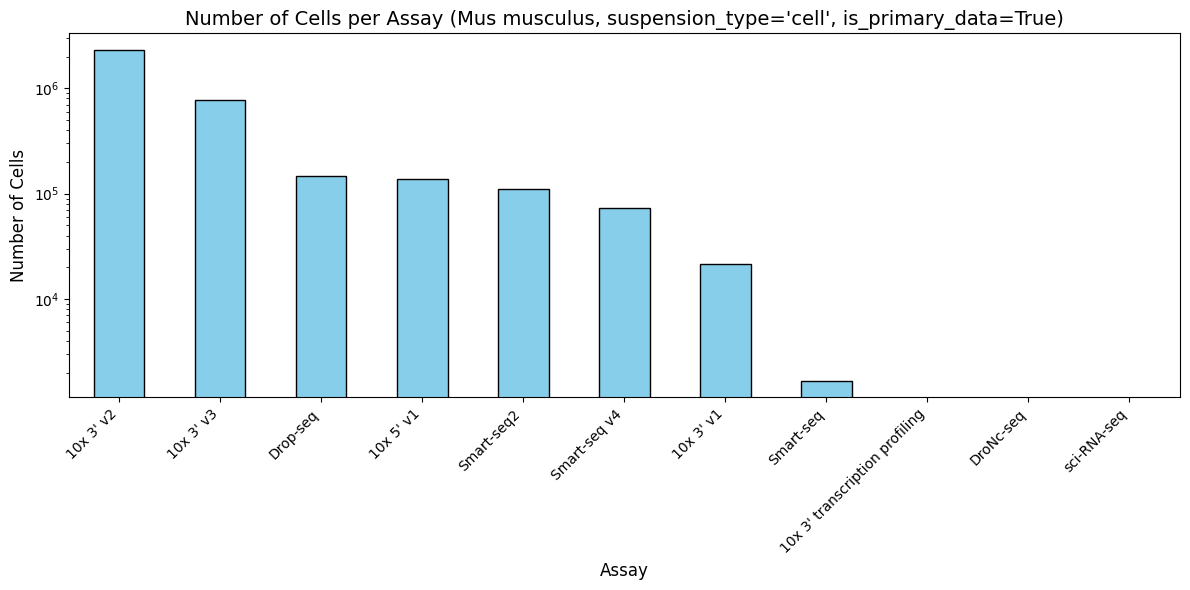

In [10]:
import cellxgene_census
import pandas as pd
import matplotlib.pyplot as plt

# Open the census
with cellxgene_census.open_soma() as census:
    # Access the 'obs' table for Mus musculus
    obs = census["census_data"]["mus_musculus"].obs

    # Load the table into a pandas DataFrame
    obs_df = obs.read().concat().to_pandas()

    # Filter for suspension_type == "cell" and is_primary_data == True
    filtered_cells = obs_df[(obs_df['suspension_type'] == "cell") & (obs_df['is_primary_data'] == True)]

    # Group by assay and count the number of cells
    cells_per_assay = filtered_cells.groupby("assay").size().sort_values(ascending=False)

    # Plot the results
    plt.figure(figsize=(12, 6))
    cells_per_assay.plot(kind="bar", color="skyblue", edgecolor="black")
    # Apply logarithmic scale to the y-axis
    plt.yscale("log")
    plt.title("Number of Cells per Assay (Mus musculus, suspension_type='cell', is_primary_data=True)", fontsize=14)
    plt.xlabel("Assay", fontsize=12)
    plt.ylabel("Number of Cells", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [2]:
%cd my_data


/my_data


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import cellxgene_census
import json

# Open the census
with cellxgene_census.open_soma() as census:
    # Access the 'obs' table for Mus musculus
    obs = census["census_data"]["homo_sapiens"].obs

    # Load the table into a pandas DataFrame
    obs_df = obs.read().concat().to_pandas()

    # Filter for primary cells and specific suspension type
    condition = (obs_df['suspension_type'] == "cell") & (obs_df['is_primary_data'] == True)
    filtered_cells = obs_df[condition]

    # Identify the most common assay
    most_common_assay = filtered_cells["assay"].value_counts().idxmax()
    most_common_assay_count = filtered_cells["assay"].value_counts().max()

    # Filter cells with the most common assay
    assay_cells = filtered_cells[filtered_cells["assay"] == most_common_assay]

    # Count healthy and ill cells
    normal_cells_count = assay_cells[assay_cells["disease"] == "normal"].shape[0]
    ill_cells_count = assay_cells[assay_cells["disease"] != "normal"].shape[0]

    # Output results
    print(f"Most common assay: {most_common_assay} ({most_common_assay_count} cells)")
    print(f"Number of healthy cells: {normal_cells_count}")
    print(f"Number of ill cells: {ill_cells_count}")

    # Store results
    results = {
        "most_common_assay": most_common_assay,
        "total_cells_most_common_assay": most_common_assay_count,
        "healthy_cells": normal_cells_count,
        "ill_cells": ill_cells_count,
    }


The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


Most common assay: 10x 3' v2 (8500279 cells)
Number of healthy cells: 5665299
Number of ill cells: 2834980


# Cell Census Summary: Homo sapiens

| Metric                  | Value                   |
|-------------------------|-------------------------|
| Most common assay       | 10x 3' v2              |
| Total cells (most assay)| 8,500,279              |
| Number of healthy cells | 5,665,299              |
| Number of ill cells     | 2,834,980              |
| Number of donor id | 2177|


In [6]:
assay_cells['donor_id'].unique() 

['C37', 'C39', 'C41', 'C42', 'C43', ..., 'homosapiens_None_2023_None_sikkemalisa_002_d1..., 'homosapiens_None_2023_None_sikkemalisa_002_d1..., 'homosapiens_None_2023_None_sikkemalisa_002_d1..., 'homosapiens_None_2023_None_sikkemalisa_002_d1..., 'homosapiens_None_2023_None_sikkemalisa_002_d1...]
Length: 2177
Categories (6603, object): ['#105', '#138', '#215', '#60', ..., 'subject_1', 'subject_2', 'subject_3', 'subject_4']

In [7]:
# Step 1: Remove rows with missing 'donor_id' and datasets with no cells
# Filter the data to only include rows with non-null 'donor_id'
filtered_assay_cells = assay_cells.dropna(subset=["donor_id"])

# Step 2: Group by 'dataset_id' and collect the unique donor_ids
dataset_to_donor_map = (
    filtered_assay_cells.groupby("dataset_id")["donor_id"]
    .apply(lambda x: list(x.unique()))  # Get unique donor_ids per dataset
    .to_dict()  # Convert to a dictionary
)

# Step 3: Remove datasets with zero donor cells (if any)
# Filter out dataset_ids with empty lists
dataset_to_donor_map = {k: v for k, v in dataset_to_donor_map.items() if v}

# Print the resulting dictionary
print(dataset_to_donor_map)


/tmp/ipykernel_3047417/3784129115.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_assay_cells.groupby("dataset_id")["donor_id"]


{'01209dce-3575-4bed-b1df-129f57fbc031': ['Donor1', 'Donor2', 'DonorA', 'DonorB'], '093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f': ['A32', 'A26'], '0c9a8cfb-6649-4d52-b418-6d8e56bd7afe': ['C37', 'C39', 'C41', 'C42', 'C43', 'C46', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C56', 'C59', 'C63', 'C64', 'C66', 'C68', 'C69'], '0f4865d5-8000-4f68-8ac7-f5efea9e5e70': ['158108', '180844', '130064', '134300', '104152', '115208', '104689', '166301'], '11ff73e8-d3e4-4445-9309-477a2c5be6f6': ['D1', 'D2', 'D3', 'ML_E', 'ML_F'], '124744b8-4681-474a-9894-683896122708': ['S1', 'S2', 'S3', 'S4', 'S5'], '1a2e3350-28a8-4f49-b33c-5b67ceb001f6': ['F21', 'F29', 'F30', 'F38', 'F41', 'F45', 'SB19PCW'], '1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1': ['Chen_Zhang_2020_NSCLC-3', 'Chen_Zhang_2020_NSCLC-2', 'Chen_Zhang_2020_NSCLC-4', 'Chen_Zhang_2020_NSCLC-1', 'Chen_Zhang_2020_NSCLC-5', 'Goveia_Carmeliet_2020_patient_40', 'Goveia_Carmeliet_2020_patient_41', 'Goveia_Carmeliet_2020_patient_42', 'Goveia_Carmeliet_2020_patient

In [8]:
# salvo il dizionario da qualche parte che sono stufa di doverlo ricalcolare
import json

# Save to a JSON file
with open("dataset_id_donor_id.json", "w") as json_file:
    json.dump(dataset_to_donor_map, json_file, indent=4)  # indent for pretty formatting


In [9]:
# now we need to know if the function that I created are able to store the needed information 

In [6]:

import census_function as cf

In [11]:
# Specify the organism
organism = "homo_sapiens"  # Replace with the correct organism
saving_path = "datasets/"
# Extract the first two items from the dictionary
for idx, (dataset_id, donor_ids) in enumerate(dataset_to_donor_map.items()):
    print(dataset_id)
    if idx < 2:  # First two datasets
        cf.save_adata_slices(dataset_id, donor_ids, organism, saving_path)
    else:
        break

01209dce-3575-4bed-b1df-129f57fbc031
All requested donor IDs have already been downloaded for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031'.
All AnnData slices have been saved in directory: datasets/
093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f
All requested donor IDs have already been downloaded for dataset_id '093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f'.
All AnnData slices have been saved in directory: datasets/
0c9a8cfb-6649-4d52-b418-6d8e56bd7afe


In [7]:
# cose da cambiare l'update del downloaded donor ids non è corretto ancora 
import anndata

In [4]:
import json
# lo tiro fuori 
# Load the dictionary back from the JSON file
with open("dataset_id_donor_id.json", "r") as json_file:
    dataset_to_donor_map = json.load(json_file)

print(dataset_to_donor_map)  


{'01209dce-3575-4bed-b1df-129f57fbc031': ['Donor1', 'Donor2', 'DonorA', 'DonorB'], '093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f': ['A32', 'A26'], '0c9a8cfb-6649-4d52-b418-6d8e56bd7afe': ['C37', 'C39', 'C41', 'C42', 'C43', 'C46', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C56', 'C59', 'C63', 'C64', 'C66', 'C68', 'C69'], '0f4865d5-8000-4f68-8ac7-f5efea9e5e70': ['158108', '180844', '130064', '134300', '104152', '115208', '104689', '166301'], '11ff73e8-d3e4-4445-9309-477a2c5be6f6': ['D1', 'D2', 'D3', 'ML_E', 'ML_F'], '124744b8-4681-474a-9894-683896122708': ['S1', 'S2', 'S3', 'S4', 'S5'], '1a2e3350-28a8-4f49-b33c-5b67ceb001f6': ['F21', 'F29', 'F30', 'F38', 'F41', 'F45', 'SB19PCW'], '1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1': ['Chen_Zhang_2020_NSCLC-3', 'Chen_Zhang_2020_NSCLC-2', 'Chen_Zhang_2020_NSCLC-4', 'Chen_Zhang_2020_NSCLC-1', 'Chen_Zhang_2020_NSCLC-5', 'Goveia_Carmeliet_2020_patient_40', 'Goveia_Carmeliet_2020_patient_41', 'Goveia_Carmeliet_2020_patient_42', 'Goveia_Carmeliet_2020_patient

In [15]:
def aggregate_across_datasets(dataset_to_donor_map, organism="Mus musculus", main_directory="datasets"):
    """
    Aggregates the AnnData files for multiple dataset_ids and their respective donor_ids.

    Parameters:
    - dataset_to_donor_map (dict): A dictionary where keys are dataset IDs and values are lists of donor IDs.
    - organism (str): Organism name to use in the census query (default is 'Mus musculus').
    - main_directory (str): Directory where AnnData slices are stored.

    Returns:
    - AnnData: A single AnnData object containing aggregated data across all dataset_ids.
    """
    # Initialize a list to collect aggregated AnnData objects for each dataset
    dataset_adata_list = []

    for dataset_id, donor_ids in dataset_to_donor_map.items():
        print(f"Aggregating donors for dataset_id '{dataset_id}' with donors {donor_ids}...")
        
        # Aggregate all donor IDs for the current dataset
        aggregated_adata = cf.aggregate_donor_id(dataset_id, donor_ids, organism=organism, main_directory=main_directory)
        
        if aggregated_adata is not None:
            # Add dataset_id information to the .obs for the concatenation
            aggregated_adata.obs["dataset_id"] = dataset_id
            dataset_adata_list.append(aggregated_adata)

    # Concatenate all dataset-level aggregated AnnData objects
    if dataset_adata_list:
        # Use `keys` to keep track of both donor_id and dataset_id
        aggregated_datasets = anndata.concat(dataset_adata_list, join="outer", index_unique="-")
        
        # Adding a new 'dataset_id' column to the combined dataset
        # This ensures that we preserve both donor_id and dataset_id
        print(f"Final aggregated AnnData object created across {len(dataset_to_donor_map)} datasets with {aggregated_datasets.n_obs} observations.")
        return aggregated_datasets
    else:
        print("No data found to aggregate across datasets.")
        return None


In [16]:
from itertools import islice

# Get the first two items from the dictionary
first_two_items = dict(islice(dataset_to_donor_map.items(), 2))

# Call the function with the subset dictionary
final_aggregated_data = aggregate_across_datasets(first_two_items, organism="Mus musculus")


Aggregating donors for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031' with donors ['Donor1', 'Donor2', 'DonorA', 'DonorB']...
All requested donor IDs have already been downloaded for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031'.
All AnnData slices have been saved in directory: datasets
Loaded data for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031' and donor_id 'Donor1' from 'datasets/01209dce-3575-4bed-b1df-129f57fbc031/01209dce-3575-4bed-b1df-129f57fbc031_Donor1.h5ad'
Loaded data for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031' and donor_id 'Donor2' from 'datasets/01209dce-3575-4bed-b1df-129f57fbc031/01209dce-3575-4bed-b1df-129f57fbc031_Donor2.h5ad'
Loaded data for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031' and donor_id 'DonorA' from 'datasets/01209dce-3575-4bed-b1df-129f57fbc031/01209dce-3575-4bed-b1df-129f57fbc031_DonorA.h5ad'
Loaded data for dataset_id '01209dce-3575-4bed-b1df-129f57fbc031' and donor_id 'DonorB' from 'datasets/01209dce-3575-4bed-b1df-129f57fb

In [21]:
final_aggregated_data.obs


,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,tissue,tissue_ontology_term_id,tissue_type,tissue_general,tissue_general_ontology_term_id,raw_sum,nnz,raw_mean_nnz,raw_variance_nnz,n_measured_vars
0-Donor1-0,4341379,01209dce-3575-4bed-b1df-129f57fbc031,10x 3' v2,EFO:0009899,"CD8-positive, alpha-beta thymocyte",CL:0000811,65-year-old human stage,HsapDv:0000159,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,9552.0,2740,3.486131,103.723429,38606
1-Donor1-0,4341380,01209dce-3575-4bed-b1df-129f57fbc031,10x 3' v2,EFO:0009899,"CD8-positive, alpha-beta thymocyte",CL:0000811,65-year-old human stage,HsapDv:0000159,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,7560.0,2659,2.843174,63.606322,38606
2-Donor1-0,4341381,01209dce-3575-4bed-b1df-129f57fbc031,10x 3' v2,EFO:0009899,"CD8-positive, alpha-beta thymocyte",CL:0000811,65-year-old human stage,HsapDv:0000159,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,7519.0,1925,3.905974,152.001030,38606
3-Donor1-0,4341382,01209dce-3575-4bed-b1df-129f57fbc031,10x 3' v2,EFO:0009899,"CD4-positive, alpha-beta thymocyte",CL:0000810,65-year-old human stage,HsapDv:0000159,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,7327.0,2083,3.517523,117.157594,38606
4-Donor1-0,4341383,01209dce-3575-4bed-b1df-129f57fbc031,10x 3' v2,EFO:0009899,"CD4-positive, alpha-beta thymocyte",CL:0000810,65-year-old human stage,HsapDv:0000159,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,6502.0,2092,3.108031,63.404871,38606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25682-A26-1,23271935,093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f,10x 3' v3,EFO:0009922,type I pneumocyte,CL:0002062,75-year-old human stage,HsapDv:0000169,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,4406.0,2122,2.076343,19.484975,31593
25683-A26-1,23271936,093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f,10x 3' v3,EFO:0009922,fibroblast of lung,CL:0002553,75-year-old human stage,HsapDv:0000169,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,1811.0,1149,1.576153,2.655563,31593
25684-A26-1,23271937,093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f,10x 3' v3,EFO:0009922,type II pneumocyte,CL:0002063,75-year-old human stage,HsapDv:0000169,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,3302.0,1665,1.983183,23.125919,31593
25685-A26-1,23271938,093d3bfe-6f0f-4ac0-a7a1-829f94d0a49f,10x 3' v3,EFO:0009922,adventitial cell,CL:0002503,75-year-old human stage,HsapDv:0000169,normal,PATO:0000461,...,lower lobe of left lung,UBERON:0008953,tissue,lung,UBERON:0002048,1245.0,911,1.366630,2.054446,31593
